# 📓 Notebook RUN - Análisis Individual de Archivos de Calibración

## Qué permite hacer:
1. Cargar y procesar un archivo de temperaturas (.txt)
2. Visualizar las series temporales de temperatura
3. Calcular los **offsets** entre todos los sensores RTD del run
4. Calcular los **errores RMS** asociados a cada offset
5. Entender la ventana temporal de estabilización (20-40 minutos)
6. Acceder a la metadata del 'run'

## Instrucciones:
1. Ejecuta las celdas en orden (Shift + Enter)
2. En la celda 3, puedes cambiar el nombre del archivo a analizar
3. Observa las matrices de offsets y errores 
4. Gráfico de temperaturas al final
5. Metadata del LogFile.


In [1]:
# Configurar el path para importar módulos locales
import sys
from pathlib import Path

# El notebook está en RTD_Calibration/notebooks/
# Necesitamos agregar el directorio padre de RTD_Calibration al path
# notebooks/ -> RTD_Calibration/ -> rtd-calib-simple/
project_root = Path('..').resolve().parent  # notebooks/.. -> RTD_Calibration, luego .parent -> rtd-calib-simple
sys.path.insert(0, str(project_root))

print(f'Directorio del proyecto agregado al path: {project_root}')
print(f'Ahora puedes importar: from RTD_Calibration.src.run import Run')

Directorio del proyecto agregado al path: /Users/vicky/Desktop/rtd-calib-simple
Ahora puedes importar: from RTD_Calibration.src.run import Run


In [2]:
# Importar módulos simplificados
from RTD_Calibration.src.logfile import Logfile
from RTD_Calibration.src.run import Run
from pathlib import Path
import pandas as pd

# Cargar el logfile
repo_root = Path('..').resolve()  # notebooks/.. -> RTD_Calibration
logfile_path = repo_root / 'data' / 'LogFile.csv'

if not logfile_path.exists():
    print(f'ERROR: No se encontró el logfile en {logfile_path}')
    logfile_df = pd.DataFrame()
else:
    logfile = Logfile(filepath=str(logfile_path))
    logfile_df = logfile.log_file
    print(f"✓ Logfile cargado: {len(logfile_df)} entradas")
    print(f"\nPrimeras filas:")
    print(logfile_df.head())

CSV file loaded successfully from '/Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/LogFile.csv'.
✓ Logfile cargado: 832 entradas

Primeras filas:
                                        Filename Selection Liquid Media Type  \
0  20220201_ln2_r48176_r48177_487178-48189_pre_1       NaN          LN2  Pre   
1      20220201_ln2_r48176_r48177_487178-48189_1       BAD          LN2  Cal   
2  20220201_ln2_r48176_r48177_487178-48189_pre_2       BAD          LN2  Pre   
3      20220201_ln2_r48176_r48177_487178-48189_2       BAD          LN2  Cal   
4  20220201_ln2_r48176_r48177_487178-48189_pre_3       BAD          LN2  Pre   

  CalibSetNumber        Date StartTime HeatFinTime FinTime REF1_ID  ...  \
0              0  01/02/2022     12:38         NaN   12:57   48176  ...   
1              1  01/02/2022     13:06         NaN   13:47   48176  ...   
2              0  01/02/2022     14:38         NaN   14:57   48176  ...   
3              1  01/02/2022     15:02         NaN   15:42   4

In [3]:
# Procesar un run específico
filename = "20220201_ln2_r48176_r48177_487178-48189_1"  # Cambia esto por el archivo que quieras procesar

print(f"\n=== Procesando run: {filename} ===\n")

# Crear instancia de Run (carga automáticamente el archivo)
run = Run(filename=filename, logfile=logfile_df)

# Mostrar datos cargados
print(f"\nDatos de temperatura:")
print(f"  - Forma: {run.temperature_data.shape}")
print(f"  - Sensores: {list(run.temperature_data.columns)}")
print(f"  - Rango temporal: {run.temperature_data.index.min()} a {run.temperature_data.index.max()}")

# Calcular offsets Y errores
# La función retorna (offsets, errors) como tupla
print(f"\n=== Calculando offsets y errores (minutos 20-40) ===")
offsets, errors = run.calculate_offsets(time_start=20, time_end=40)

print(f"\n Matriz de offsets (diferencias respecto a referencias):")
print(offsets)

print(f"\n Matriz de errores RMS (incertidumbre de cada offset):")
print(errors)

print(f"\nDatos listos para análisis")
print(f"Tip: Cada offset tiene su error asociado (formato: offset ± error)")


=== Procesando run: 20220201_ln2_r48176_r48177_487178-48189_1 ===

Cargando: /Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/temperature_files/RTD_Calibs/CalSetN_1/20220201_ln2_r48176_r48177_487178-48189_1.txt
  Datos cargados: 692 registros
  Sensores asociados: 14

Datos de temperatura:
  - Forma: (692, 14)
  - Sensores: ['48178', '48179', '48180', '48181', '48182', '48183', '48184', '48185', '48186', '48187', '48188', '48189', '48176', '48177']
  - Rango temporal: 2022-01-02 13:05:31 a 2022-01-02 13:47:33

=== Calculando offsets y errores (minutos 20-40) ===

 Matriz de offsets (diferencias respecto a referencias):
          48178     48179     48180     48181     48182     48183     48184  \
48178  0.000000  0.010979  0.022672 -0.018468 -0.055907  0.038722 -0.014386   
48179 -0.010979  0.000000  0.011693 -0.029448 -0.066886  0.027743 -0.025365   
48180 -0.022672 -0.011693  0.000000 -0.041140 -0.078579  0.016050 -0.037058   
48181  0.018468  0.029448  0.041140  0.000000 

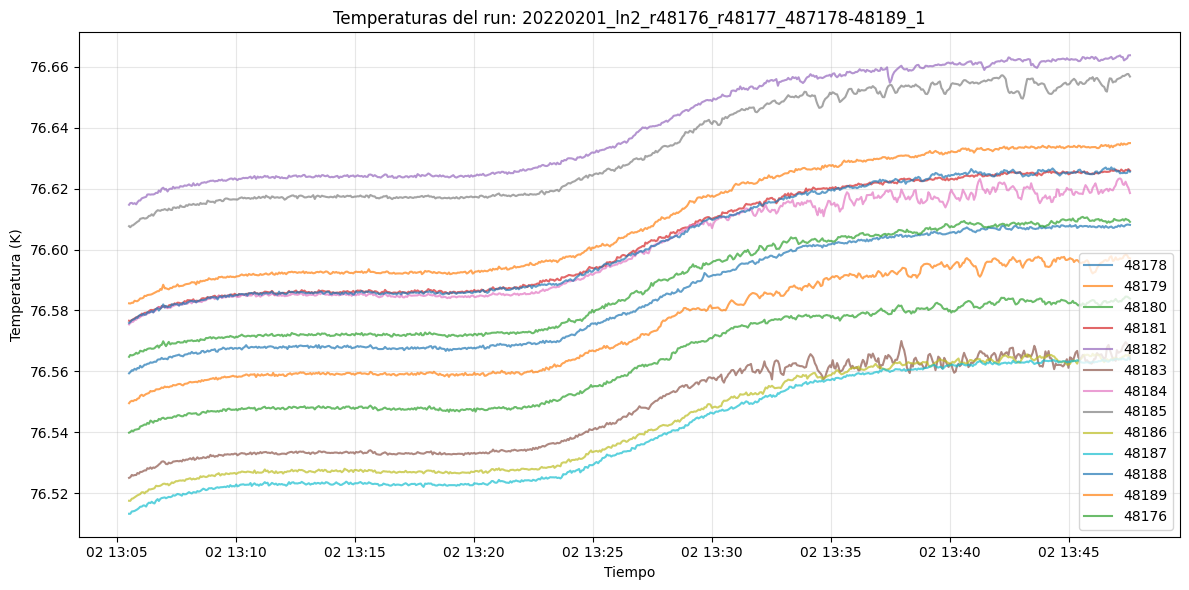

Gráfico generado


In [4]:
# Visualizar datos de temperatura 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# Plotear las primeras 13 sensores
for sensor in list(run.temperature_data.columns)[:13]:
    ax.plot(run.temperature_data.index, run.temperature_data[sensor], label=sensor, alpha=0.7)

ax.set_xlabel('Tiempo')
ax.set_ylabel('Temperatura (K)')
ax.set_title(f'Temperaturas del run: {filename}')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Gráfico generado")

In [5]:
# Acceder a metadata del run
print("Información del run desde el LogFile:\n")
print(f"  Set de calibración: {run.metadata['set_number']}")
print(f"  Fecha: {run.metadata['date']}")
print(f"  Medio líquido: {run.metadata['liquid_media']}")
print(f"  Tipo: {run.metadata['type']}")
print(f"  Selección: {run.metadata['selection']}")
print(f"  Sensores referencia: {run.metadata['ref1_id']}, {run.metadata['ref2_id']}")
print(f"  Placa: {run.metadata['board']}")
print(f"  Todos los sensores: {run.metadata['all_sensors']}")

print(f"\nComentarios: {run.metadata['comments']}")

# Uso práctico: Filtrar runs por características
print(f"\n Uso práctico:")
if run.metadata['selection'] == 'BAD':
    print("  Este run está marcado como BAD - considerar excluir del análisis")
if run.metadata['liquid_media'] == 'LN2':
    print("  Calibración con nitrógeno líquido (~77K)")


Información del run desde el LogFile:

  Set de calibración: 1
  Fecha: 01/02/2022
  Medio líquido: LN2
  Tipo: Cal
  Selección: BAD
  Sensores referencia: 48176, 48177
  Placa: IFIC-B1
  Todos los sensores: [48178, 48179, 48180, 48181, 48182, 48183, 48184, 48185, 48186, 48187, 48188, 48189, 48176, 48177]

Comentarios: Experimented a crack between the two volumes during the run. Now the two cilindric volumes are not fixed together

 Uso práctico:
  Este run está marcado como BAD - considerar excluir del análisis
  Calibración con nitrógeno líquido (~77K)
